# Anscombe's quartet

Background: https://en.wikipedia.org/wiki/Anscombe's_quartet

In [1]:
import pandas as pd
import scipy
import seaborn as sns

In [2]:
anscombe = pd.DataFrame(
    {"x_1": [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
     "y_1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
     "x_2": [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
     "y_2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
     "x_3": [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
     "y_3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
     "x_4": [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8],
     "y_4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
        })

In [3]:
anscombe

,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


In [4]:
# mean and standard deviation are basically the same for the x and y values
anscombe.describe()

,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


In [5]:
print("Mean values")
for series_name in anscombe.columns:
    print(f"{series_name}: {anscombe[series_name].mean()}")
print("\n")
    
print("Standard deviations")    
for series_name in anscombe.columns:
    print(f"{series_name}: {anscombe[series_name].std()}")

Mean values
x_1: 9.0
y_1: 7.500909090909093
x_2: 9.0
y_2: 7.50090909090909
x_3: 9.0
y_3: 7.5
x_4: 9.0
y_4: 7.500909090909091


Standard deviations
x_1: 3.3166247903554
y_1: 2.031568135925815
x_2: 3.3166247903554
y_2: 2.0316567355016177
x_3: 3.3166247903554
y_3: 2.030423601123667
x_4: 3.3166247903554
y_4: 2.0305785113876023


In [6]:
# similar correlation between x and y series
anscombe.corr()

,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4
x_1,1.000000,0.816421,1.000000,0.816237,1.000000,0.816287,-0.500000,-0.314047
y_1,0.816421,1.000000,0.816421,0.750005,0.816421,0.468717,-0.529093,-0.489116
x_2,1.000000,0.816421,1.000000,0.816237,1.000000,0.816287,-0.500000,-0.314047
y_2,0.816237,0.750005,0.816237,1.000000,0.816237,0.587919,-0.718437,-0.478095
x_3,1.000000,0.816421,1.000000,0.816237,1.000000,0.816287,-0.500000,-0.314047
y_3,0.816287,0.468717,0.816287,0.587919,0.816287,1.000000,-0.344661,-0.155472
x_4,-0.500000,-0.529093,-0.500000,-0.718437,-0.500000,-0.344661,1.000000,0.816521
y_4,-0.314047,-0.489116,-0.314047,-0.478095,-0.314047,-0.155472,0.816521,1.000000


In [7]:
for number in [1, 2, 3 , 4]:
    print(anscombe[f"x_{number}"].corr(anscombe[f"y_{number}"], method="pearson"))

0.81642051634484
0.8162365060002428
0.8162867394895984
0.8165214368885028


<AxesSubplot:xlabel='x_1', ylabel='y_1'>

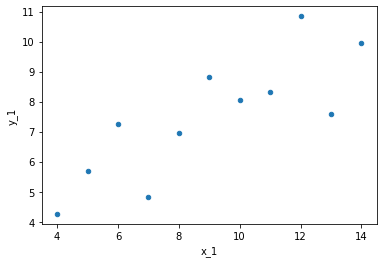

In [8]:
anscombe.plot.scatter(x="x_1", y="y_1")

<AxesSubplot:xlabel='x_2', ylabel='y_2'>

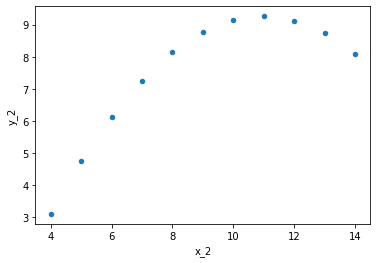

In [9]:
anscombe.plot.scatter(x="x_2", y="y_2")

<AxesSubplot:xlabel='x_3', ylabel='y_3'>

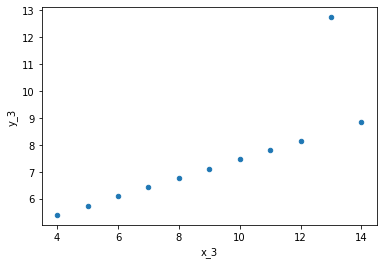

In [10]:
anscombe.plot.scatter("x_3", "y_3")

<AxesSubplot:xlabel='x_4', ylabel='y_4'>

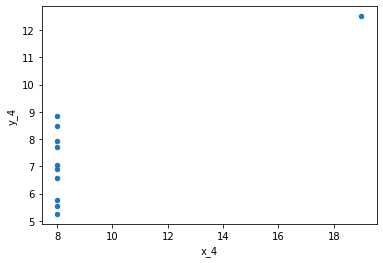

In [11]:
anscombe.plot.scatter("x_4", "y_4")

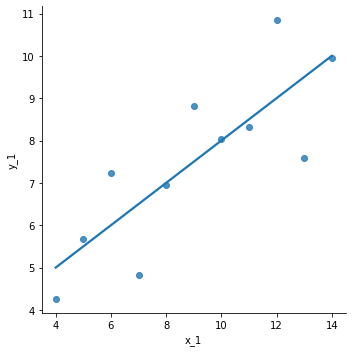

In [12]:
sns.lmplot(data=anscombe, x="x_1", y="y_1", ci=None)

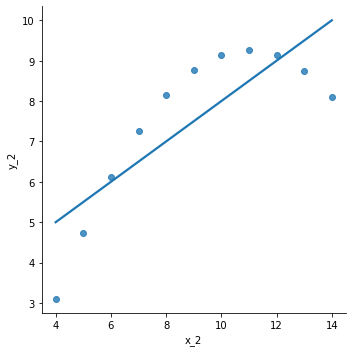

In [13]:
sns.lmplot(data=anscombe, x="x_2", y="y_2", ci=None)

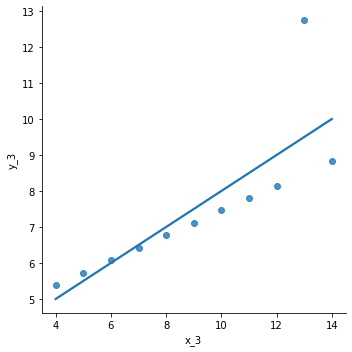

In [14]:
sns.lmplot(data=anscombe, x="x_3", y="y_3", ci=None)

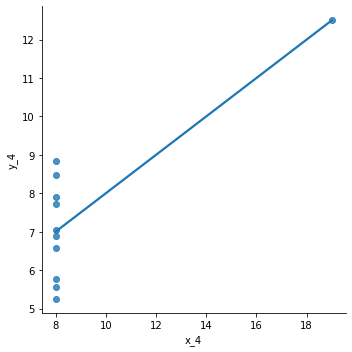

In [15]:
sns.lmplot(data=anscombe, x="x_4", y="y_4", ci=None)